# 第一个线性感知机算法：PLA

## 1. 什么是感知机（Perceptron）

**PLA**全称是Perceptron Linear Algorithm，即线性感知机算法，属于一种最简单的**感知机**（Perceptron）模型。

感知机模型是机器学习二分类问题中的一个非常简单的模型。它的基本结构如下图所示：

![](img/../pic/1.jpg)

其中，$x_i$是输入，$w_i$表示**权重系数**，$b$表示**偏移常数**。感知机的线性输出为：

$$scores=\sum_i^Nw_ix_i+b$$

为了简化计算，通常我们将$b$作为**权重系数**的一个维度，即$w_0$。同时，将输入$x$扩展一个维度，为1。这样，上式简化为：

$$scores=\sum_i^{N+1}w_ix_i$$

$scores$是感知机的输出，接下来就要对$scores$进行判断：

* 若$scores\geq0$，则$\hat y=1$（正类）

* 若$scores<0$，则$\hat y=-1$（负类）

以上就是线性感知机模型的基本概念，简单来说，它由**线性得分计算**和**阈值比较**两个过程组成，最后根据比较结果判断样本属于正类还是负类。

## 2. PLA理论解释

对于二分类问题，可以使用感知机模型来解决。PLA的基本原理就是**逐点修正**，首先在超平面上随意取一条分类面，统计分类错误的点；然后随机对某个错误点就行修正，即变换直线的位置，使该错误点得以修正；接着再随机选择一个错误点进行纠正，分类面不断变化，直到所有的点都完全分类正确了，就得到了最佳的分类面。

利用二维平面例子来进行解释，第一种情况是错误地将正样本（y=1）分类为负样本（y=-1）。此时，$wx<0$，即$w$与$x$的夹角大于90度，分类线$l$的两侧。修正的方法是让夹角变小，修正$w$值，使二者位于直线同侧：

$$w:=w+x=w+yx$$

修正过程示意图如下所示：

![](img/../pic/2.jpg)

第二种情况是错误地将负样本（y=-1）分类为正样本（y=1）。此时，$wx>0$，即$w$与$x$的夹角小于90度，分类线$l$的同一侧。修正的方法是让夹角变大，修正$w$值，使二者位于直线两侧：

$$w:=w-x=w+yx$$

修正过程示意图如下所示：

![](img/../pic/3.jpg)

经过两种情况分析，我们发现PLA每次$w$的更新表达式都是一样的：$w:=w+yx$。掌握了每次$w$的优化表达式，那么PLA就能不断地将所有错误的分类样本纠正并分类正确。

## 3. 数据准备

### 导入数据

数据集存放在'../data/'目录下，该数据集包含了100个样本，正负样本各50，特征维度为2。

In [65]:
import numpy as np
import pandas as pd

data = pd.read_csv('./data/data1.csv', header=None)#要想让读取时不将设为标签，即需要设header=None
# 样本输入，维度（100，2）
X = data.iloc[:,:2].values
# 样本输出，维度（100，）
y = data.iloc[:,2].values #读取样本输入与输出并以values转化为数组形式

In [66]:
data.iloc[:, :2].values

array([[7. , 4.7],
       [6.4, 4.5],
       [6.9, 4.9],
       [5.5, 4. ],
       [6.5, 4.6],
       [5.7, 4.5],
       [6.3, 4.7],
       [4.9, 3.3],
       [6.6, 4.6],
       [5.2, 3.9],
       [5. , 3.5],
       [5.9, 4.2],
       [6. , 4. ],
       [6.1, 4.7],
       [5.6, 3.6],
       [6.7, 4.4],
       [5.6, 4.5],
       [5.8, 4.1],
       [6.2, 4.5],
       [5.6, 3.9],
       [5.9, 4.8],
       [6.1, 4. ],
       [6.3, 4.9],
       [6.1, 4.7],
       [6.4, 4.3],
       [6.6, 4.4],
       [6.8, 4.8],
       [6.7, 5. ],
       [6. , 4.5],
       [5.7, 3.5],
       [5.5, 3.8],
       [5.5, 3.7],
       [5.8, 3.9],
       [6. , 5.1],
       [5.4, 4.5],
       [6. , 4.5],
       [6.7, 4.7],
       [6.3, 4.4],
       [5.6, 4.1],
       [5.5, 4. ],
       [5.5, 4.4],
       [6.1, 4.6],
       [5.8, 4. ],
       [5. , 3.3],
       [5.6, 4.2],
       [5.7, 4.2],
       [5.7, 4.2],
       [6.2, 4.3],
       [5.1, 3. ],
       [5.7, 4.1],
       [5.1, 1.4],
       [4.9, 1.4],
       [4.7,

In [67]:
X

array([[7. , 4.7],
       [6.4, 4.5],
       [6.9, 4.9],
       [5.5, 4. ],
       [6.5, 4.6],
       [5.7, 4.5],
       [6.3, 4.7],
       [4.9, 3.3],
       [6.6, 4.6],
       [5.2, 3.9],
       [5. , 3.5],
       [5.9, 4.2],
       [6. , 4. ],
       [6.1, 4.7],
       [5.6, 3.6],
       [6.7, 4.4],
       [5.6, 4.5],
       [5.8, 4.1],
       [6.2, 4.5],
       [5.6, 3.9],
       [5.9, 4.8],
       [6.1, 4. ],
       [6.3, 4.9],
       [6.1, 4.7],
       [6.4, 4.3],
       [6.6, 4.4],
       [6.8, 4.8],
       [6.7, 5. ],
       [6. , 4.5],
       [5.7, 3.5],
       [5.5, 3.8],
       [5.5, 3.7],
       [5.8, 3.9],
       [6. , 5.1],
       [5.4, 4.5],
       [6. , 4.5],
       [6.7, 4.7],
       [6.3, 4.4],
       [5.6, 4.1],
       [5.5, 4. ],
       [5.5, 4.4],
       [6.1, 4.6],
       [5.8, 4. ],
       [5. , 3.3],
       [5.6, 4.2],
       [5.7, 4.2],
       [5.7, 4.2],
       [6.2, 4.3],
       [5.1, 3. ],
       [5.7, 4.1],
       [5.1, 1.4],
       [4.9, 1.4],
       [4.7,

In [68]:
y[49]

1

### 数据分类与可视化

下面我们在二维平面上绘出正负样本的分布情况。

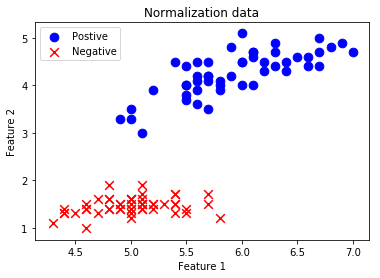

In [69]:
import matplotlib.pyplot as plt

#绘制散点图
plt.scatter(X[:50, 0], X[:50, 1], s=75, c ='blue', marker = 'o',label = 'Postive')
plt.scatter(X[50:, 0], X[50:, 1], s=75, c ='red', marker = 'x', label = 'Negative')
plt.xlabel("Feature 1")
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left') #设定图例位置
plt.title('Normalization data')
plt.show()

## 4. PLA算法

### 特征归一化

首先分别对两个特征进行归一化处理，即：

$$X=\frac{X-\mu}{\sigma}$$

其中，$\mu$是特征均值，$\sigma$是特征标准差。

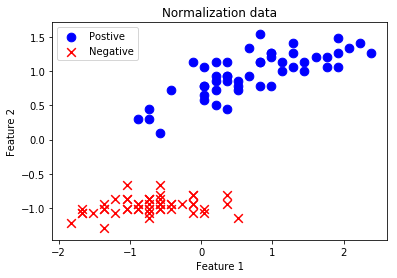

In [70]:
mu = np.mean(X,axis=0)
sigma = np.std(X, axis=0, ddof = 1)
X = (X-mu)/sigma

#绘制散点图
plt.scatter(X[:50, 0], X[:50, 1], s=75, c ='blue', marker = 'o',label = 'Postive')
plt.scatter(X[50:, 0], X[50:, 1], s=75, c ='red', marker = 'x', label = 'Negative')
plt.xlabel("Feature 1")
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left') #设定图例位置
plt.title('Normalization data')
plt.show()


### 直线初始化

In [71]:
X

array([[ 2.3827395 ,  1.26867088],
       [ 1.44772073,  1.13069689],
       [ 2.22690304,  1.40664488],
       [ 0.04519257,  0.7857619 ],
       [ 1.60355719,  1.19968389],
       [ 0.3568655 ,  1.13069689],
       [ 1.29188427,  1.26867088],
       [-0.8898262 ,  0.30285292],
       [ 1.75939366,  1.19968389],
       [-0.42231681,  0.7167749 ],
       [-0.73398974,  0.44082691],
       [ 0.66853842,  0.9237359 ],
       [ 0.82437488,  0.7857619 ],
       [ 0.98021135,  1.26867088],
       [ 0.20102904,  0.50981391],
       [ 1.91523012,  1.06170989],
       [ 0.20102904,  1.13069689],
       [ 0.51270196,  0.8547489 ],
       [ 1.13604781,  1.13069689],
       [ 0.20102904,  0.7167749 ],
       [ 0.66853842,  1.33765788],
       [ 0.98021135,  0.7857619 ],
       [ 1.29188427,  1.40664488],
       [ 0.98021135,  1.26867088],
       [ 1.44772073,  0.99272289],
       [ 1.75939366,  1.06170989],
       [ 2.07106658,  1.33765788],
       [ 1.91523012,  1.47563188],
       [ 0.82437488,

In [72]:
#将一列1数字加入作为偏置项w0需要的数字，hstack进行合并
X = np.hstack((np.ones((X.shape[0], 1)), X))
X

array([[ 1.        ,  2.3827395 ,  1.26867088],
       [ 1.        ,  1.44772073,  1.13069689],
       [ 1.        ,  2.22690304,  1.40664488],
       [ 1.        ,  0.04519257,  0.7857619 ],
       [ 1.        ,  1.60355719,  1.19968389],
       [ 1.        ,  0.3568655 ,  1.13069689],
       [ 1.        ,  1.29188427,  1.26867088],
       [ 1.        , -0.8898262 ,  0.30285292],
       [ 1.        ,  1.75939366,  1.19968389],
       [ 1.        , -0.42231681,  0.7167749 ],
       [ 1.        , -0.73398974,  0.44082691],
       [ 1.        ,  0.66853842,  0.9237359 ],
       [ 1.        ,  0.82437488,  0.7857619 ],
       [ 1.        ,  0.98021135,  1.26867088],
       [ 1.        ,  0.20102904,  0.50981391],
       [ 1.        ,  1.91523012,  1.06170989],
       [ 1.        ,  0.20102904,  1.13069689],
       [ 1.        ,  0.51270196,  0.8547489 ],
       [ 1.        ,  1.13604781,  1.13069689],
       [ 1.        ,  0.20102904,  0.7167749 ],
       [ 1.        ,  0.66853842,  1.337

In [119]:
#权重初始化
w = np.random.randn(3,1)

In [102]:
w

array([[ 0.68073321],
       [-1.6410814 ],
       [-0.72387757]])

显示初始化直线位置：

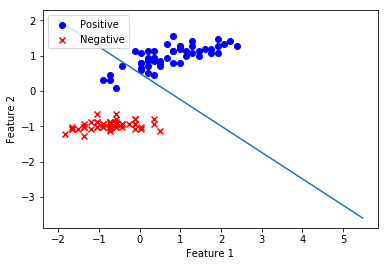

In [103]:
x1 =  -2
y1 =-(w[0]*1 + w[1]*x1)/w[2]
x2 =  2
y2 =-(w[0]*1 + w[1]*x2)/w[2]

plt.scatter(X[:50, 1], X[:50, 2], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 1], X[50:, 2], color='red', marker='x', label='Negative')
plt.plot([x1, y1], [x2, y2])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

由上图可见，一般随机生成的分类线，错误率很高。

### 计算scores，更新权重

接下来，计算scores，得分函数与阈值0做比较，大于零则$\hat y=1$，小于零则$\hat y=-1$

In [104]:
s = np.dot(X, w)
s

array([[-4.14789867],
       [-2.51358047],
       [-3.99203463],
       [ 0.0377731 ],
       [-2.81925893],
       [-0.72339824],
       [-2.35771644],
       [ 1.92178199],
       [-3.07499925],
       [ 0.85493219],
       [ 1.56616539],
       [-1.08506446],
       [-1.2409285 ],
       [-1.8462358 ],
       [-0.01821466],
       [-3.23086329],
       [-0.46765792],
       [-0.779386  ],
       [-2.00209984],
       [-0.16802908],
       [-1.3846933 ],
       [-1.49666882],
       [-2.45759272],
       [-1.8462358 ],
       [-2.41370419],
       [-2.97512297],
       [-3.68635617],
       [-3.53049213],
       [-1.4906192 ],
       [-0.22401684],
       [ 0.13764938],
       [ 0.18758752],
       [-0.67950972],
       [-1.79024804],
       [ 0.04382271],
       [-1.4906192 ],
       [-3.38067771],
       [-2.20790201],
       [-0.26790536],
       [ 0.0377731 ],
       [-0.16197946],
       [-1.79629766],
       [-0.72944786],
       [ 1.66604167],
       [-0.3178435 ],
       [-0

In [105]:
s

array([[-4.14789867],
       [-2.51358047],
       [-3.99203463],
       [ 0.0377731 ],
       [-2.81925893],
       [-0.72339824],
       [-2.35771644],
       [ 1.92178199],
       [-3.07499925],
       [ 0.85493219],
       [ 1.56616539],
       [-1.08506446],
       [-1.2409285 ],
       [-1.8462358 ],
       [-0.01821466],
       [-3.23086329],
       [-0.46765792],
       [-0.779386  ],
       [-2.00209984],
       [-0.16802908],
       [-1.3846933 ],
       [-1.49666882],
       [-2.45759272],
       [-1.8462358 ],
       [-2.41370419],
       [-2.97512297],
       [-3.68635617],
       [-3.53049213],
       [-1.4906192 ],
       [-0.22401684],
       [ 0.13764938],
       [ 0.18758752],
       [-0.67950972],
       [-1.79024804],
       [ 0.04382271],
       [-1.4906192 ],
       [-3.38067771],
       [-2.20790201],
       [-0.26790536],
       [ 0.0377731 ],
       [-0.16197946],
       [-1.79629766],
       [-0.72944786],
       [ 1.66604167],
       [-0.3178435 ],
       [-0

In [108]:
#按照输入格式初始化预测y_pred
y_pred = np.ones_like(y)

In [111]:
#判定求得小于0的索引下标
loc_n = np.where(s<0)[0]
#将相应索引的值色的顶为-1
y_pred[loc_n] = -1
y_pred

array([-1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

接着，从分类错误的样本中选择一个，使用PLA更新权重系数$w$。

In [112]:
w

array([[ 0.68073321],
       [-1.6410814 ],
       [-0.72387757]])

In [114]:
#对应元素判定，错误返回序列且返回第一个错误的点
t = np.where(y != y_pred)[0][0]
#更新权重
w = w + y[t]*X[t, ].reshape((3,1))

In [115]:
w

array([[1.68073321],
       [0.74165811],
       [0.54479331]])

### 迭代更新训练

更新权重$w$是个迭代过程，只要存在分类错误的样本，就不断进行更新，直至所有的样本都分类正确。（注意，前提是正负样本完全可分）

In [120]:
for i in range(100):
    s = np.dot(X, w)
    y_pred = np.ones_like(y)
    loc_n = np.where(s<0)[0]
    y_pred[loc_n] = -1
    num_fault = len(np.where(y != y_pred)[0])
    print("第%d次更新, 分类错误的点个数：%d"%(i ,num_fault))
    if num_fault == 0:
        break
    else:
        t = np.where(y != y_pred)[0][0]
        w = w + y[t]*X[t, ].reshape((3,1))

第0次更新, 分类错误的点个数：89
第1次更新, 分类错误的点个数：7
第2次更新, 分类错误的点个数：12
第3次更新, 分类错误的点个数：0


迭代完毕后，得到更新后的权重系数$w$，绘制此时的分类直线是什么样子。

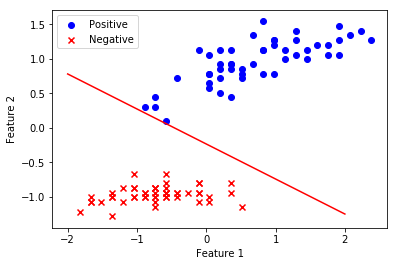

In [121]:
# 直线第一个坐标（x1，y1）
x1 = -2
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
# 直线第二个坐标（x2，y2）
x2 = 2
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
# 作图
plt.scatter(X[:50, 1], X[:50, 2], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 1], X[50:, 2], color='red', marker='x', label='Negative')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

其实，PLA算法的效率还算不错，只需要数次更新就能找到一条能将所有样本完全分类正确的分类线。所以得出结论，对于正负样本线性可分的情况，PLA能够在有限次迭代后得到正确的分类直线。

## 5. PLA优化(Packet Algorithm)

刚刚我们的数据是线性可分的，可以使用PCA来得到分类直线。但是，如果数据不是线性可分，即找不到一条直线能够将所有的正负样本完全分类正确，这种情况下，似乎PCA会永远更新迭代下去，却找不到正确的分类线。所以，对于数据不可分的情况，应该要对PLA进行改进、优化。

**PLA优化的基本做法很简单，就是如果迭代更新后分类错误样本比前一次少，则更新权重系数$w$；没有减少则保持当前权重系数$w$不变。也就是说，可以把条件放松，即不苛求每个点都分类正确，而是容忍有错误点，取错误点的个数最少时的权重系数$w$。通常在有限的迭代次数里，都能保证得到最佳的分类线。**

### 导入数据

数据集存放在'../data/'目录下，该数据集包含了100个样本，正负样本各50，特征维度为2。

In [133]:
data = pd.read_csv('./data/data2.csv', header=None)
# 样本输入，维度（100，2）
X = data.iloc[:,:2].values
# 样本输出，维度（100，）
y = data.iloc[:,2].values

### 数据分类与可视化

下面我们在二维平面上绘出正负样本的分布情况。

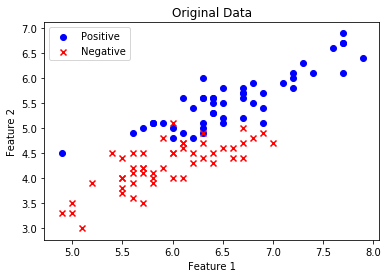

In [134]:
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 0], X[50:, 1], color='red', marker='x', label='Negative')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.title('Original Data')
plt.show()

很明显，从图中可以看出，正类和负类样本并不是线性可分的。这时候，我们就需要对PCA进行改进，寻找合适的分类线。

### 特征归一化

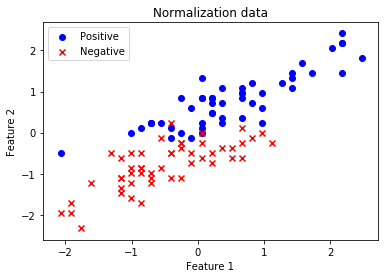

In [135]:
# 均值
u = np.mean(X, axis=0)
# 方差
v = np.std(X, axis=0)

X = (X - u) / v

# 作图
plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 0], X[50:, 1], color='red', marker='x', label='Negative')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.title('Normalization data')
plt.show()

### 直线初始化

In [136]:
# X加上偏置项
X = np.hstack((np.ones((X.shape[0],1)), X))
# 权重初始化
w = np.random.randn(3,1)

显示初始化直线位置

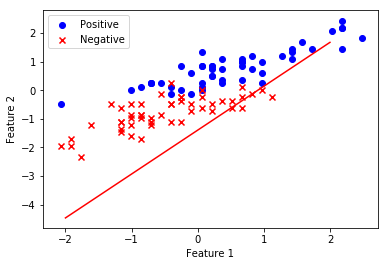

In [137]:
# 直线第一个坐标（x1，y1）
x1 = -2
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
# 直线第二个坐标（x2，y2）
x2 = 2
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
# 作图
plt.scatter(X[:50, 1], X[:50, 2], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 1], X[50:, 2], color='red', marker='x', label='Negative')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

### 迭代更新训练

In [138]:
for i in range(100):
    s = np.dot(X, w)
    y_pred = np.ones_like(y)
    loc_n = np.where(s<0)[0]
    y_pred[loc_n] = -1
    num_fault = len(np.where(y != y_pred)[0])
    
    if num_fault == 0:
        break
    else:
        r = np.random.choice(num_fault) #随机选择一个错误分类点
        t = np.where(y != y_pred)[0][r]
        w2 = w +y[t]*X[t, :].reshape((3,1))
        
        s = np.dot(X, w2)
        y_pred = np.ones_like(y)
        loc_n = np.where(s<0)[0]
        y_pred[loc_n] = -1
        num_fault2 = len(np.where(y != y_pred)[0])
        if num_fault2 < num_fault:
            w = w2
            print("第%4d次更新，分类错误的点个数：%4d" %(i, num_fault2))
        else:
            print("第%2d次更新，分类错误的点个数：%2d" %(i, num_fault))

第   0次更新，分类错误的点个数：  25
第   1次更新，分类错误的点个数：  24
第   2次更新，分类错误的点个数：  15
第 3次更新，分类错误的点个数：15
第 4次更新，分类错误的点个数：15
第 5次更新，分类错误的点个数：15
第 6次更新，分类错误的点个数：15
第 7次更新，分类错误的点个数：15
第 8次更新，分类错误的点个数：15
第 9次更新，分类错误的点个数：15
第10次更新，分类错误的点个数：15
第11次更新，分类错误的点个数：15
第12次更新，分类错误的点个数：15
第13次更新，分类错误的点个数：15
第14次更新，分类错误的点个数：15
第15次更新，分类错误的点个数：15
第16次更新，分类错误的点个数：15
第17次更新，分类错误的点个数：15
第18次更新，分类错误的点个数：15
第19次更新，分类错误的点个数：15
第20次更新，分类错误的点个数：15
第21次更新，分类错误的点个数：15
第22次更新，分类错误的点个数：15
第23次更新，分类错误的点个数：15
第24次更新，分类错误的点个数：15
第25次更新，分类错误的点个数：15
第26次更新，分类错误的点个数：15
第27次更新，分类错误的点个数：15
第28次更新，分类错误的点个数：15
第29次更新，分类错误的点个数：15
第30次更新，分类错误的点个数：15
第31次更新，分类错误的点个数：15
第32次更新，分类错误的点个数：15
第33次更新，分类错误的点个数：15
第34次更新，分类错误的点个数：15
第35次更新，分类错误的点个数：15
第36次更新，分类错误的点个数：15
第37次更新，分类错误的点个数：15
第38次更新，分类错误的点个数：15
第39次更新，分类错误的点个数：15
第40次更新，分类错误的点个数：15
第41次更新，分类错误的点个数：15
第42次更新，分类错误的点个数：15
第43次更新，分类错误的点个数：15
第44次更新，分类错误的点个数：15
第45次更新，分类错误的点个数：15
第46次更新，分类错误的点个数：15
第47次更新，分类错误的点个数：15
第48次更新，分类错误的点个数：15
第49次更新，分类错误的点个数：15
第50次更新，分类错误的点个数：15
第51次更新，分类错误的点个数：15


迭代完毕后，得到更新后的权重系数$w$，绘制此时的分类直线是什么样子。

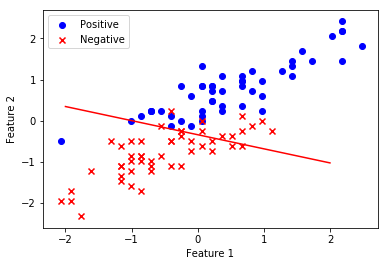

In [139]:
# 直线第一个坐标（x1，y1）
x1 = -2
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
# 直线第二个坐标（x2，y2）
x2 = 2
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
# 作图
plt.scatter(X[:50, 1], X[:50, 2], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 1], X[50:, 2], color='red', marker='x', label='Negative')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

### 计算分类正确率：

In [143]:
s = np.dot(X, w)
y_pred = np.ones_like(y)
loc_n = np.where(s<0)[0]
y_pred[loc_n] = -1
num_fault = len(np.where(y != y_pred)[0])
print("分类正确率" + str(( len(y) - num_fault) / len(y)))

分类正确率0.85


### 注意：

经过实例验证，优化后的PLA算法不一定每次都能找到最优分类线。在足够的迭代次数下，使用一般的PCA算法，竟一般都能得到最佳的分类线，即使开始的时候，分类线会有所振荡。但最终都基本能寻找到最佳位置附近。这也是PCA算法的特点之一。下面是使用一般PLA算法处理非线性可分样本实例的效果。

直线初始化

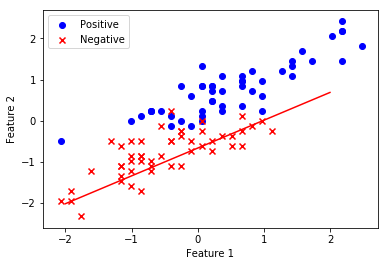

In [144]:
# 权重初始化
w = np.random.randn(3,1)

# 直线第一个坐标（x1，y1）
x1 = -2
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
# 直线第二个坐标（x2，y2）
x2 = 2
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
# 作图
plt.scatter(X[:50, 1], X[:50, 2], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 1], X[50:, 2], color='red', marker='x', label='Negative')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

迭代训练

In [146]:
for i in range(500):
    s = np.dot(X, w)
    y_pred = np.ones_like(y)
    loc_n = np.where(s < 0)[0]
    y_pred[loc_n] = -1
    num_fault = len(np.where(y != y_pred)[0])
    print('第%2d次更新，分类错误的点个数：%2d' % (i, num_fault))
    if num_fault == 0:
        break
    else:
        t = np.where(y != y_pred)[0][0]
        w += y[t] * X[t, :].reshape((3,1))
        

第 0次更新，分类错误的点个数： 6
第 1次更新，分类错误的点个数： 8
第 2次更新，分类错误的点个数： 5
第 3次更新，分类错误的点个数： 8
第 4次更新，分类错误的点个数： 4
第 5次更新，分类错误的点个数： 5
第 6次更新，分类错误的点个数： 5
第 7次更新，分类错误的点个数： 5
第 8次更新，分类错误的点个数： 5
第 9次更新，分类错误的点个数： 4
第10次更新，分类错误的点个数： 6
第11次更新，分类错误的点个数：10
第12次更新，分类错误的点个数： 5
第13次更新，分类错误的点个数： 5
第14次更新，分类错误的点个数： 5
第15次更新，分类错误的点个数： 5
第16次更新，分类错误的点个数： 5
第17次更新，分类错误的点个数： 4
第18次更新，分类错误的点个数： 6
第19次更新，分类错误的点个数： 8
第20次更新，分类错误的点个数： 6
第21次更新，分类错误的点个数： 8
第22次更新，分类错误的点个数： 5
第23次更新，分类错误的点个数： 8
第24次更新，分类错误的点个数： 4
第25次更新，分类错误的点个数： 5
第26次更新，分类错误的点个数： 5
第27次更新，分类错误的点个数： 5
第28次更新，分类错误的点个数： 5
第29次更新，分类错误的点个数： 4
第30次更新，分类错误的点个数： 6
第31次更新，分类错误的点个数：10
第32次更新，分类错误的点个数： 5
第33次更新，分类错误的点个数： 5
第34次更新，分类错误的点个数： 5
第35次更新，分类错误的点个数： 5
第36次更新，分类错误的点个数： 5
第37次更新，分类错误的点个数： 4
第38次更新，分类错误的点个数： 6
第39次更新，分类错误的点个数： 8
第40次更新，分类错误的点个数： 6
第41次更新，分类错误的点个数： 8
第42次更新，分类错误的点个数： 5
第43次更新，分类错误的点个数： 8
第44次更新，分类错误的点个数： 4
第45次更新，分类错误的点个数： 5
第46次更新，分类错误的点个数： 5
第47次更新，分类错误的点个数： 5
第48次更新，分类错误的点个数： 5
第49次更新，分类错误的点个数： 4
第50次更新，分类错误的点个数： 6
第51次更新，分类错误的点个数：10
第52次更新，分类错误的

迭代完毕后，得到更新后的权重系数$w$ ，绘制此时的分类直线是什么样子。

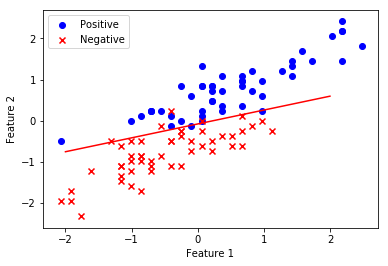

In [147]:
# 直线第一个坐标（x1，y1）
x1 = -2
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
# 直线第二个坐标（x2，y2）
x2 = 2
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
# 作图
plt.scatter(X[:50, 1], X[:50, 2], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 1], X[50:, 2], color='red', marker='x', label='Negative')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

计算分类正确率：

In [148]:
s = np.dot(X, w)
y_pred = np.ones_like(y)
loc_n = np.where(s < 0)[0]
y_pred[loc_n] = -1
accuracy = len(np.where(y == y_pred)[0]) / len(y)
print('accuracy: %.2f' % accuracy)

accuracy: 0.94


## 总结

PCA是机器学习最简单的算法之一。PCA处理线性可分问题，优化的PCA解决线性不可分的问题。实际验证表明，一般的PCA处理线性可分及线性不可分问题都有不错的表现，即一般能得到最佳的分类直线。